In [2]:
#| hide
import sys
sys.path.append('../__pypackages__/3.9/lib/')
print(sys.path)

['/afs/crc.nd.edu/group/TAI/Users/painswor/nbdev-framework-example/nbs', '/opt/anaconda3/lib/python39.zip', '/opt/anaconda3/lib/python3.9', '/opt/anaconda3/lib/python3.9/lib-dynload', '', '/afs/crc.nd.edu/user/p/painswor/.local/lib/python3.9/site-packages', '/opt/anaconda3/lib/python3.9/site-packages', '/opt/anaconda3/lib/python3.9/site-packages/IPython/extensions', '/afs/crc.nd.edu/user/p/painswor/.ipython', '../__pypackages__/3.9/lib/']


# Classification Preprocessing

## Preliminary Analysis

In [4]:
#| hide
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('../data/cleaned-data/Concatenated_Clean_data.csv')

/tmp/ipykernel_368557/2868801960.py:1: DtypeWarning: Columns (5,6,11,15,16,17,18,19,27,29,30,33,34,35,36,43,45,48,49,50,51,52,58,59,60,61,62,63,69,70,71,72,73,74,75,76,77,78,79,82,83,117,118,122,123,127,131,135,136,142,155,158,167,168,172,173,175,176) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/cleaned-data/Concatenated_Clean_data.csv')


We can now focus on the features of interest

In [6]:
list1 = df.columns.tolist()
list2 = ['c109','c52','c53','c56','c50','c144','c24','c23','c25','c78','c27','c13','c102','c106','c41','c49','c59','c80','c96']
set_dif = set(list1).symmetric_difference(set(list2))
temp3 = list(set_dif)
df.drop(columns=temp3, inplace=True)

In [7]:
df

,c144,c23,c24,c25,c27,c13,c102,c106,c41,c49,c50,c52,c53,c56,c59,c78,c80,c96,c109
0,1L71,GRUMAV,AA1A,AA1,SO,MO,1,B,3,E,22.0,K,101.0,1187.0,MO,PL,C,IB,Dusk
1,1H71,CESSNA,182C,182,CE,IL,1,B,3,G,22.0,B,124.0,364.0,IL,PF,E,DD,Day
2,1H71,CESSNA,150,150,CE,TN,8,B,1,G,34.0,N,202.0,205.0,CA,PF,E,DD,Dawn
3,1H71,CESSNA,172M,172,CE,IN,1,B,1,G,37.0,P,77.0,95.0,IN,GC,V,HB,Day
4,1H71,CESSNA,177B,177,CE,OR,2,B,3,G,29.0,N,1.0,233.0,OR,SN,V,IA,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113937,2L72,BOEING,7373H4,737,NM,CA,C,B,NaN,NaN,NaN,NaN,0.0,0.0,NaN,BS,V,IB,Day
113938,1K71,VALENT,TAIFUN17E,17,EU,NM,1,B,1,NaN,71.0,O,55.0,300.0,NaN,AS,Y,IB,Day
113939,2G72,BOEING,234,234,EA,OR,7,C,3,NaN,48.0,O,7000.0,18000.0,MT,HO,V,FB,Day
113940,NaN,NaN,NaN,NaN,NaN,OH,1,B,TT,R,NaN,O,0.0,0.0,NaN,TC,V,DF,Day


Let's look at the percentage of null values in each column grouped into bins with width 10%

In [8]:
na_count = df.isna().sum()
shape = df.shape[0]
print(shape)
print(len(df.columns))
total = shape
acceptable_pct_100 = total
acceptable_pct_90 = total * .9
acceptable_pct_80 = total * .8
acceptable_pct_70 = total * .7
acceptable_pct_60 = total * .6
acceptable_pct_50 = total * .5
acceptable_pct_40 = total * .4
acceptable_pct_30 = total * .3
acceptable_pct_20 = total * .2
acceptable_pct_10 = total * .1
acceptable_pct_0 = 0
acceptable_columns = {
    '100': [],
    '90': [],
    '80': [],
    '70': [],
    '60': [],
    '50': [],
    '40': [],
    '30': [],
    '20': [],
    '10': [],
    '0': [],
    'full': []
}
for column in df.columns:
    column_counts = df[column].value_counts()
    na_count = df[column].isna().sum()
    na_series = pd.Series([na_count], index=['NaN'])  
    column_counts = column_counts.append(na_series) 
    if na_count == acceptable_pct_100:
        acceptable_columns['100'].append(column)
    elif na_count > acceptable_pct_90:
        acceptable_columns['90'].append(column)
        print(column)
    elif na_count > acceptable_pct_80:
        acceptable_columns['80'].append(column)
    elif na_count > acceptable_pct_70:
        acceptable_columns['70'].append(column)
    elif na_count > acceptable_pct_60:
        acceptable_columns['60'].append(column)
    elif na_count > acceptable_pct_50:
        acceptable_columns['50'].append(column)
    elif na_count > acceptable_pct_40:
        acceptable_columns['40'].append(column)
    elif na_count > acceptable_pct_30:
        acceptable_columns['30'].append(column)
    elif na_count > acceptable_pct_20:
        acceptable_columns['20'].append(column)
    elif na_count > acceptable_pct_10:
        acceptable_columns['10'].append(column)
    elif na_count > acceptable_pct_0:
        acceptable_columns['0'].append(column)
    elif na_count == acceptable_pct_0:
        acceptable_columns['full'].append(column)
#print(df.describe())
#print(len(acceptable_columns), acceptable_columns)
total_columns_in_dict = 0
for key, value in acceptable_columns.items():
    print(key,' : ',len(value))
    total_columns_in_dict += len(value)

113942
19
100  :  0
90  :  0
80  :  0
70  :  0
60  :  0
50  :  0
40  :  0
30  :  0
20  :  0
10  :  0
0  :  18
full  :  1


/tmp/ipykernel_368557/3180988196.py:35: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  column_counts = column_counts.append(na_series)
/tmp/ipykernel_368557/3180988196.py:35: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  column_counts = column_counts.append(na_series)
/tmp/ipykernel_368557/3180988196.py:35: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  column_counts = column_counts.append(na_series)
/tmp/ipykernel_368557/3180988196.py:35: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  column_counts = column_counts.append(na_series)
/tmp/ipykernel_368557/3180988196.py:35: FutureWarning: The series.append method is deprecated and will b

We can now save the dataframe to a csv, called `19_features.csv`

In [10]:
df.to_csv('../data/cleaned-data/19_features.csv')

# Stratifying the Data

In [11]:
#| hide
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

Now, let's get a better sense of the target column `c78`. Specifcally, we'd like to know how many instances there are of each label, and limit ourselves to only the most frequent labels to reduce numerosity.

Let's take a stratified random sample of observations to reduce numerosity while maintainig the reletaive frequency of `c78` labels

In [13]:
N = (df.shape[0] * .2)

#perform stratified random sampling
df2 = df.groupby('c78', group_keys=False).apply(lambda x: x.sample(int(np.rint(N*len(x)/len(df))))).sample(frac=1).reset_index(drop=True)

In [14]:
df2['c78'].value_counts()

GC    2820
LO    1802
HO    1766
GN    1217
AS    1160
      ... 
RC       1
FC       1
WR       1
DP       1
OF       1
Name: c78, Length: 111, dtype: int64

In [15]:
df2.shape[0]

22789

In [16]:
df2['c78'].unique()

array(['CH', 'SO', 'FA', 'IO', 'UA', 'LO', 'GI', 'FX', 'HO', 'PF', 'FP',
       'II', 'TC', 'PP', 'GF', 'UN', 'IA', 'GC', 'AS', 'OS', 'UO', 'IP',
       'GN', 'SN', 'UT', 'BS', 'HA', 'DC', 'DR', 'WX', 'LC', 'US', 'FT',
       'MA', 'ST', 'FW', 'GA', 'OM', 'SR', 'HG', 'AU', 'PC', 'FO', 'RS',
       'PL', 'DW', 'LR', 'PS', 'SP', 'OC', 'XL', 'CE', 'BW', 'PW', 'WS',
       'ES', 'LA', 'GP', 'OB', 'SA', 'HT', 'MT', 'PO', 'GE', 'MM', 'MO',
       'RI', 'UD', 'FR', 'MI', 'PB', 'VM', 'GL', 'SD', 'OT', 'ME', 'IS',
       'TP', 'PA', 'PI', 'SC', 'WR', 'TO', 'RV', 'TX', 'CI', 'AA', 'EQ',
       'FN', 'WO', 'RC', 'IC', 'EL', 'IE', 'AF', 'IT', 'IG', 'NO', 'CP',
       'MC', 'AW', 'AT', 'FC', 'PD', 'DE', 'OP', 'AL', 'WF', 'DP', 'AI',
       'OF'], dtype=object)

In [17]:
top_labels = df2['c78'].value_counts()[:50].index.tolist()
df2 =df2[df2['c78'].isin(top_labels)]

In [18]:
df2.shape[0]

21264

In [30]:
df2.to_csv("../data/cleaned-data/stratified_subset_data.csv")

## Feature Selection

In [20]:
#| hide
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

Reading in the `stratified_subset_data.csv`, we see that some of the features are categorical

In [22]:
df=pd.read_csv("../data/cleaned-data/stratified_subset_data.csv",index_col=0)
df.head()

,c144,c23,c24,c25,c27,c13,c102,c106,c41,c49,c50,c52,c53,c56,c59,c78,c80,c96,c109
0,1H71,CESSNA,150D,150,CE,MI,1,B,1,S,59.0,O,214.0,214.0,IN,CH,O,DD,Day
1,1H71,CESSNA,172,172,CE,WA,1,C,1,S,30.0,O,309.0,378.0,WA,SO,V,AA,Day
2,1Q71,WACO,YMF,YMF,EA,RI,1,B,1,S,47.0,O,NaN,NaN,RI,CH,E,DD,Day
3,1L71,PIPER,PA32R301,PA32,SO,VA,1,C,1,S,43.0,O,90.0,267.0,VA,FA,V,BD,Night
4,1G72,BOLKMS,BK117A1,117,EU,FL,5,B,3,S,48.0,O,100.0,4000.0,FL,IO,V,HD,Night


/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


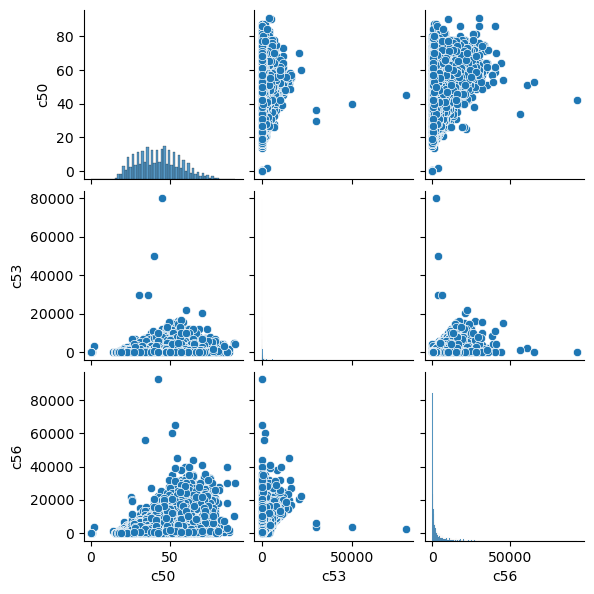

In [23]:
cols = ['c144', 'c23','c24','c52','c78','c109','c13','c27','c106','c49','c59','c80','c96','c41','c102','c25','c50','c53','c56']
plot = sns.pairplot(df[cols], size=2.0)

In [24]:
df.dtypes

c144     object
c23      object
c24      object
c25      object
c27      object
c13      object
c102     object
c106     object
c41      object
c49      object
c50     float64
c52      object
c53     float64
c56     float64
c59      object
c78      object
c80      object
c96      object
c109     object
dtype: object

In [25]:
bin_cols = ['c50', 'c53', 'c56']
for col in bin_cols:
    df[col] = pd.qcut(df[col], q = 10, labels = [i for i in range(10)])

df[bin_cols]

,c50,c53,c56
0,8,6,2
1,1,7,3
2,6,NaN,NaN
3,5,4,2
4,6,5,7
...,...,...,...
22784,2,4,3
22785,8,5,4
22786,8,6,3
22787,4,5,2


In [26]:
df = df.astype({'c50': object, 'c53': object, 'c56': object})
df.dtypes

c144    object
c23     object
c24     object
c25     object
c27     object
c13     object
c102    object
c106    object
c41     object
c49     object
c50     object
c52     object
c53     object
c56     object
c59     object
c78     object
c80     object
c96     object
c109    object
dtype: object

In [27]:
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
df['c78'] = le.fit_transform(df['c78'])

categorical_cols = df.columns.to_list()
categorical_cols.remove('c78')

#One-hot-encode the categorical columns.

one_hot = pd.get_dummies(df[categorical_cols])

#Concatenate the two dataframes : 
df = pd.concat([one_hot, df['c78']], axis=1)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [28]:
df.head()

,c144_1B00,c144_1B71,c144_1B72,c144_1D71,c144_1F71,c144_1G00,c144_1G71,c144_1G72,c144_1H00,c144_1H71,...,c96_KG,c96_PJ,c96_PL,c96_SR,c109_Dawn,c109_Day,c109_Dusk,c109_Night,c109_Unknown,c78
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,2
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,40
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,5
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,20


In [29]:
df.describe()

,c144_1B00,c144_1B71,c144_1B72,c144_1D71,c144_1F71,c144_1G00,c144_1G71,c144_1G72,c144_1H00,c144_1H71,...,c96_KG,c96_PJ,c96_PL,c96_SR,c109_Dawn,c109_Day,c109_Dusk,c109_Night,c109_Unknown,c78
count,21264.000000,21264.000000,21264.000000,21264.000000,21264.000000,21264.000000,21264.000000,21264.000000,21264.000000,21264.000000,...,21264.000000,21264.000000,21264.000000,21264.000000,21264.000000,21264.00000,21264.000000,21264.000000,21264.000000,21264.000000
mean,0.008982,0.000047,0.000047,0.000094,0.000047,0.000094,0.047075,0.002869,0.000047,0.418172,...,0.002916,0.004374,0.000141,0.004044,0.007007,0.82341,0.030004,0.116817,0.003762,21.104919
std,0.094351,0.006858,0.006858,0.009698,0.006858,0.009698,0.211804,0.053485,0.006858,0.493270,...,0.053920,0.065990,0.011877,0.063468,0.083417,0.38133,0.170602,0.321210,0.061223,13.521966
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,11.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,17.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,29.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,49.000000


In [31]:
df.to_csv('../data/cleaned-data/Encoded_Features.csv')